## Define the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load, normalize, and resize
def load_transform(filepath, 
                   img_size=(16, 16), 
                   conv_to_theta=True,
                   flatten=True):
    
    """
    flatten (True/False) - flatten to a vector
    """

    img = Image.open(filepath)
    img = img.resize(img_size)
    img = np.array(img) / 255 # normalize
    
    if conv_to_theta:
        img = img * np.pi / 2 # convert to number between 0 and pi/2
    
    if flatten:
        img = img.flatten()
    
    return img

## Run on All images

In [2]:
img_size = (16, 16)

In [3]:
import glob
train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
train_set_1 = []
# for k in ['VeryMild', 'Mild', 'Moderate']:
for k in ['Moderate']:
    train_set_1 += glob.glob(f"data/train/{k}Demented/*.jpg")

test_set_0 = glob.glob("data/test/NonDemented/*.jpg")
test_set_1 = []
for k in ['Moderate']:
    test_set_1 += glob.glob(f"data/test/{k}Demented/*.jpg")

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

train_set_0 2560
train_set_1 52
test_set_0 640
test_set_1 12


In [11]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size) for f in test_set_1])

# save
np.save('data/processed/train_set_0.npy', train_set_0b)
np.save('data/processed/train_set_1.npy', train_set_1b)

np.save('data/processed/test_set_0.npy', test_set_0b)
np.save('data/processed/test_set_1.npy', test_set_1b)

In [10]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_1])

# save
np.save('data/processed/train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/test_set_mtx_1.npy', test_set_1b)

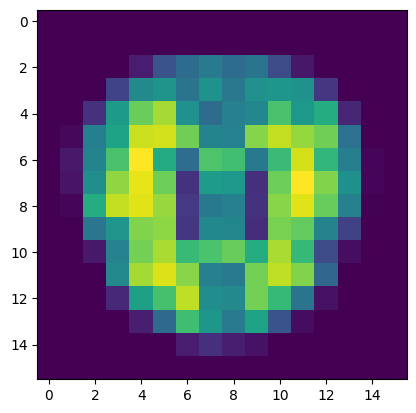

In [9]:
plt.imshow(np.array(test_set_1b[0]))

## Test on One image

In [ ]:
for i in range(5):
    f, axs = plt.subplots(1, 2)

    filepath = train_set_1[i]

    # Unflattened
    img1 = load_transform(filepath, 
                         img_size = img_size,
                         conv_to_theta=True,
                         flatten=False
                        )

    filepath = train_set_0[i]

    # Unflattened
    img0 = load_transform(filepath, 
                         img_size = img_size,
                         conv_to_theta=True,
                         flatten=False
                        )
    axs[0].imshow(img0)
    axs[1].imshow(img1)
    plt.show()

In [ ]:
# Flattened
img = load_transform(filepath, 
                     img_size = img_size,
                     conv_to_theta=True,
                     flatten=True
                    )

np.save('sample.npy', img)
img = np.load('sample.npy')

print(img[:100])